## Теоретическая справка

Пусть даны две выборки:$$X_m = {x_1, x_2, \ldots, x_m}\\Y_n = {y_1, y_2, \ldots, y_n}$$

Здесь и далее будем предполагать независимость выборок, иначе критерии не имеют смысла.

### Критерий Стьюдента

**Используется** для проверки гипотезы о смещении (равенстве средних).

**Предположение:** Обе выборки получены из нормального распределения, при этом их дисперсии равны.

**Статистика:** $$T = \frac{\overline{Y_n} - \overline{X_m}}{S_N \sqrt{\frac1n + \frac1m}}$$
$$S_N = \frac{1}{N-2}\left[\sum_{i=1}^m(x_i-\overline x)^2 + \sum_{i=1}^n(y_i-\overline y)^2\right]$$

Имеет распределение Стьюдента с $N-2$ степенями свободы. Однако при большом $N$ ($>50$ точно) можно использовать нормальное распределение.

**p_value:** Если альтернативная гипотеза имеет вид $E[X] \neq E[Y]$, то критическая область двусторонняя и p уровень значимости равен удвоенной вероятности отклонится от $|T|$ вправо (или от -|T| влево). Если другая альтернативная гипотеза, то p уровень значимости не удваивается.

### Критерий Вилконсона

**Используется** для проверки равенства средних, если выборки не имеют нормальное распределение. Реализовывать самому не надо, используем встроенный критерий **Манна-Уитни**

### Критерий Фишера

**Используется** для проверки гипотезы о равенстве дисперсий.

**Предположение:** Обе выборки получены из нормального распределения.

**Статистика:** $$T = \frac{s^2_y}{s^2_x} \sim F(n-1, m-1)$$

**p_value:** Если альтернативная гипотеза имеет вид $D[X] \neq D[Y]$, то статистика имеет распределение $F(n-1, m-1)$, если $s^2_y > s^2_x$ и распределение $F(m-1, n-1)$ иначе. p уровень значимости равен вероятности отклониться от $T$ вправо

### Критерий Ансари-Бредли

**Используется** для проверки гипотезы о равенстве дисперсий.

**Статистика:**
$$A_{m,n} = \sum_{i=1}^m\left(\frac{N+1}{2} - \left|R_i - \frac{N+1}{2}\right|\right)$$

Эта статистика при малых $m$ и $n$ имеет своё собственное специальное распределение и соответствующую таблицу для уровней значимости, но нас интересует нормальная апроксимация.

**Стандартизация:**

$$\mu (A_{m,n}) = 
\begin{cases}
\frac{m(N+2)}{4}, & \text{если N - четное} \\
\frac{m(N+2)^2}{4N},& \text{если N - нечетное}
\end{cases}$$

Если нет связок, то дисперсия:
$$
D(A_{m,n}) =
\begin{cases}
\frac{mn(N+2)(N-2)}{48(N-1)}, & \text{если N - четное} \\
\frac{mn(N^2+3)(N+1)}{48N^2}, & \text{если N - нечетное}
\end{cases}$$

Если есть связки, то дисперсия:
$$
D(A_{m,n}) =
\begin{cases}
\frac{mn\left(16\sum\limits_{j=1}^k (t_jR_j^2)-N(N+2)^2)    \right)}{16N(N-1)}, & \text{если N - четное} \\
\frac{mn\left(16N\sum\limits_{j=1}^k (t_jR_j^2)- (N+1)^4)    \right)}{16N^2(N-1)}, & \text{если N - нечетное}
\end{cases}$$

Тогда нормальная статистика:

$$A_{m, n}^* = \frac{A_{m,n} - \mu(A_{m,n})}{\sqrt{D(A_{m,n})}}$$

Стандартизованная статистика имеет нормальное распределение.

**p_value:** Если альтернативная гипотеза имеет вид $D[X] \neq D[Y]$, то имеем дело с двусторонним тестом и p уровень значимости вычисляется так же, как в критерии Стьюдента, только используется нормальное распределение, а не распределение Стьюдента

### Критерий Шапиро-Уилка

Используется для проверки гипотезы о нормальном распределении. Самому реализовывать не надо, используем встроенный.

### План проверки гипотез

1. Проверяем выборки на нормальность. Если хотя бы одна из выборок не имеет нормального распределения, то используем критерий **Манна-Уитни** для проверки гипотезы о смещении и критерий **Ансари-Бредли** для проверки гипотезы о сжатии.
2. Если обе выборки имеют нормальное распределение, то для проверки гипотезы о сжатии используем критерий **Фишера** (F-test). Если по результатам F-test дисперсии оказались равны, то используем критерий **Стьюдента** для проверки гипотезы о смещении, если не равны, то используем критерий **Ансари-Бредли**

#### Считаем данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from collections import Counter

In [2]:
X = pd.read_csv('https://raw.githubusercontent.com/zhukpm/da_spring2020/master/data/lw3/projects/1032172712/sample1.csv',
                header=None).to_numpy().ravel()
Y = pd.read_csv('https://raw.githubusercontent.com/zhukpm/da_spring2020/master/data/lw3/projects/1032172712/sample2.csv',
                header=None).to_numpy().ravel()
alpha = 0.05
m = X.size
n = Y.size
N = m + n
answer = []

#### Проверим на нормальность

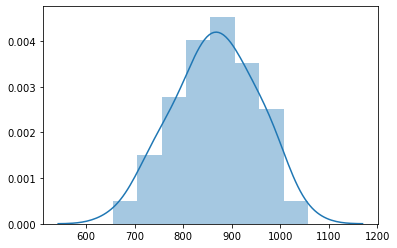

In [3]:
sns.distplot(X)

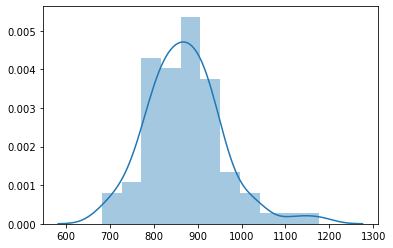

In [4]:
sns.distplot(Y)

In [5]:
T, p_val = stats.shapiro(X)
if p_val >= alpha:
    print(f'p_value = {p_val} > 0.05 => остаемся в Н0 (выборка X нормальная)')
else:
    print(f'p_value = {p_val} <= 0.05 => отвергаем Н0 (выборка X ненормальная)')

p_value = 0.8807798624038696 > 0.05 => остаемся в Н0 (выборка X нормальная)


In [6]:
T, p_val = stats.shapiro(Y)
if p_val >= alpha:
    print(f'p_value = {p_val} > 0.05 => остаемся в Н0 (выборка Y нормальная)')
else:
    print(f'p_value = {p_val} <= 0.05 => отвергаем Н0 (выборка Y ненормальная)')

p_value = 0.040780242532491684 <= 0.05 => отвергаем Н0 (выборка Y ненормальная)


#### Поскольку одна из выборок ненормальная, воспользуемся непараметрическими критериями для проверки остальных гипотез

#### Проверим равенство средних при помощи критерия Манна-Уитни

In [7]:
T, p_val = stats.mannwhitneyu(X, Y, alternative='two-sided')
answer.append(T)
answer.append(p_val)
if p_val >= alpha:
    print(f'p_value = {p_val} > 0.05 => остаемся в Н0 (средние равны)')
    answer.append(0)
else:
    print(f'p_value = {p_val} <= 0.05 => отвергаем Н0 (средние не равны)')
    answer.append(1)

p_value = 0.9946527970806632 > 0.05 => остаемся в Н0 (средние равны)


#### Проверим равенство средних при помощи критерия Ансари-Бредли

##### Сначала проверим равенство выборочных медиан

Если не равны, то преобразуем выборки.

In [8]:
X_new = np.copy(X)
Y_new = np.copy(Y)
if np.median(X) != np.median(Y):
    print('Медианы не равны, выборки преобразованы.')
    X_new = X_new - np.median(X)
    Y_new = Y_new - np.median(Y)

Медианы не равны, выборки преобразованы.


In [9]:
Z = np.r_[X_new, Y_new] # объединенная выборка
R = stats.rankdata(Z) # ранги элементов в выборке
# статистика
A = 0
for i in range(m):
    A += (N + 1) / 2 - np.abs(R[i] - (N + 1) / 2)
# мат. ожидание статистики
A_mean = m * (N + 2) / 4 if N % 2 == 0 else m * (N + 1) ** 2 / (4 * N)
# дисперсия статистики
# если нет связок, то всё легко
if np.unique(Z).size == Z.size:
    A_var = m * n * (N + 2) * (N - 2) / (48 * (N - 1)) if N % 2 == 0 else m * n * ((N ** 2) + 3) * (N + 1) / (48 * (N ** 2))
else:
    # если есть связки
    # поправка чуть другая (по-другому считаем ранги)
    R_sym = np.copy(R)
    for i in range(N):
        R_sym[i] = min(R_sym[i], N - R_sym[i] + 1)
    sum_of_ties = 0
    for val, count in Counter(R_sym).most_common():
        sum_of_ties += count * val ** 2
    if N % 2 == 0:
        A_var = m * n * (16 * sum_of_ties -  N * (N + 2) ** 2) / 16 / N / (N - 1)
    else:
        A_var = m * n * (16 * N * sum_of_ties - (N + 1) ** 4) / (16 * N ** 2 * (N - 1))
A_std = (A - A_mean) / np.sqrt(A_var)
p_value = 2 * min(stats.norm.cdf(A_std), 1 - stats.norm.cdf(A_std))
print('by hands:', f'T = {A}', f'p_value = {p_value}') 
print('by scipy:', f'T = {stats.ansari(X_new, Y_new)[0]}', f'p_value = {stats.ansari(X_new, Y_new)[1]}')
answer.append(A)
answer.append(p_value)
if p_value >= alpha:
    print(f'p_value = {p_value} > 0.05 => остаемся в Н0 (дисперсии равны)')
    answer.append(0)
else:
    print(f'p_value = {p_value} <= 0.05 => отвергаем Н0 (дисперсии не равны)')
    answer.append(1)

by hands: T = 3125.0 p_value = 0.44521187272454654
by scipy: T = 3125.0 p_value = 0.44521187272454654
p_value = 0.44521187272454654 > 0.05 => остаемся в Н0 (дисперсии равны)


#### Код для критерия Стьюдента (T-test)

In [10]:
x_mean = X.mean()
y_mean = Y.mean()
s1, s2 = 0, 0
for x in X:
    s1 += (x - x_mean) ** 2
for y in Y:
    s2 += (y - y_mean) ** 2
s_n = np.sqrt((s1 + s2) / (N - 2))
T = (y_mean - x_mean) / (s_n * np.sqrt(1 / n + 1 / m))
p_value = 2 * min(stats.t.cdf(T, N - 2), 1 - stats.t.cdf(T, N - 2))
print('by hands:', f'T = {T}', f'p_value = {p_value}') 
print('by scipy:', f'T = {stats.ttest_ind(Y, X)[0]}', f'p_value = {stats.ttest_ind(Y, X)[1]}')

by hands: T = 0.340210192837632 p_value = 0.734144478072972
by scipy: T = 0.3402101928376321 p_value = 0.7341444780729718


#### Код для критерия Фишера (F-test)

In [11]:
x_var = stats.tvar(X)
y_var = stats.tvar(Y)
F = y_var / x_var
p_value = 1 - stats.f.cdf(F, n - 1, m - 1)
print(f'T = {F}', f'p_value = {p_value}') 

T = 1.031547480323786 p_value = 0.44569718250918855


#### answer: 
* значение статистики при проверке гипотезы об однородности вида смещение
* p-значение статистики при проверке гипотезы об однородности вида смещение
* итоговая гипотеза при проверке гипотезы об однородности вида смещение (0 или 1)
* значение статистики при проверке гипотезы об однородности вида сжатие/растяжение
* p-значение статистики при проверке гипотезы об однородности вида сжатие/растяжение
* итоговая гипотеза при проверке гипотезы об однородности вида сжатие/растяжение (0 или 1)

#### save answer

In [12]:
keys = ['mt_s', 'mt_p', 'mt_h', 'vt_s', 'vt_p', 'vt_h']
ans = dict()
for key, val in zip(keys, answer):
    ans[key] = val

pd.DataFrame(ans, index=[0]).to_csv('answer.csv', index=False)
# check right write
data = pd.read_csv('answer.csv')
data

,mt_s,mt_p,mt_h,vt_s,vt_p,vt_h
0,3281.0,0.994653,0,3125.0,0.445212,0


&copy; **Alexander Nikolaev**